# Testing rpy2: Princals

We first start with setting up the environment and install the required R and Python packages:

In [ ]:
#!R -e "install.packages(c('MPsychoR','mirt', 'mice', 'psych', 'eRm', 'ltm'), repos='https://cran.uni-muenster.de', quiet=TRUE)"
#!pip install rpy2==3.5.17
# Uncomment the line above if you are using Google Colab

In [7]:
import os
import subprocess
import glob

# Find the most recent version of R installed in the Program Files\R directory
r_base_path = r'C:\Program Files\R'
r_versions = glob.glob(os.path.join(r_base_path, 'R-*'))
r_versions.sort(reverse=True)
latest_r_version = r_versions[0]

# Set R environment variable
os.environ['R_HOME'] = latest_r_version

# Full path to the R executable
r_executable = os.path.join(latest_r_version, 'bin', 'R.exe')

# Install R packages
subprocess.run([r_executable, '-e', "install.packages(c('MPsychoR','mirt', 'Gifi', 'psych', 'eRm', 'ltm'), repos='https://cran.uni-muenster.de', quiet=TRUE)"], check=True)

# Install rpy2 Python package
!pip install rpy2==3.5.17


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# General imports
import numpy as np
import pandas as pd

# Rpy2 imports
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri, numpy2ri
from rpy2.robjects.packages import importr

# Automatic conversion of arrays and dataframes
pandas2ri.activate()
numpy2ri.activate()

# Set random seed for reproducibility
ro.r('set.seed(123)')

# Ipython extenrsion for magix plotting
%load_ext rpy2.ipython

# R imports
importr('base')
importr('mirt')
importr('MPsychoR')
importr('Gifi')
importr('psych')
importr('stats')
importr('eRm')
importr('ltm')

c:\Users\maku1542\Desktop\Main\Classes\Psy126-Python\.venv\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


rpy2.robjects.packages.Package as a <module 'ltm'>

## 1. Assessing dimensionality

### The dataset

To illustrate dimensionality assessment using these approaches, we consider a
dataset from Koller and Alexandrowicz (2010). They used the Neuropsychological
Test Battery for Number Processing and Calculation in Children (ZAREKI-R; von
Aster et al., 2006) for the assessment of dyscalculia in children. There are n =
341 children (2nd to 4th year of elementary school) in their sample, eight items on
addition, eight items on subtraction, and two covariates (time needed for completion
in minutes as well as grade). In this example we consider eight binary subtraction
items only.

### Load & inspect the data
Use the function you already know in your head to take a first look at the data.  
Then, use the `.str.startswith()` method to subset only the subtraction items in this manner:  


`example_subset = example_data.loc[:, example_data.columns.str.startswith("common_subset_item_name")]`

Lastly, convert your dataframe into an r object: `r_df = pandas2ri.py2rpy(df)`.

In [9]:
# Load the data in R
ro.r("data(zareki)")

# Get as DataFrame
zareki = pandas2ri.rpy2py(ro.globalenv['zareki'])

# Subset the df to only include items starting with "subtr"
zarsub = zareki.loc[:, zareki.columns.str.startswith("subtr")]
zarsub.head()

,subtr1,subtr2,subtr3,subtr4,subtr5,subtr6,subtr7,subtr8
1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
5,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


### **Princals**

We are interested in whether the subtraction items measure a single latent trait
or if multiple traits are needed. We start our dimensionality assessment with fitting
a two-dimensional Princals solution using the **Gifi** package (Mair and De Leeuw,
2017) in order to get a picture of item associations in a 2D space.\
\
You can now run the code chunk:

In [10]:
# Put data back into R
ro.globalenv['zarsub'] = zarsub

# Princals
ro.r("prinzar <- princals(zarsub)")
print(ro.r("summary(prinzar)"))


Loadings (cutoff = 0.1):
       Comp1  Comp2 
subtr2  0.623       
subtr3  0.565  0.119
subtr6  0.609 -0.153
subtr7  0.657       
subtr8  0.584 -0.194
subtr5  0.308 -0.787
subtr1  0.340  0.464
subtr4  0.500  0.398

Importance (Variance Accounted For):
                 Comp1   Comp2
Eigenvalues     2.3111  1.0723
VAF            28.8882 13.4040
Cumulative VAF 28.8900 42.2900

None


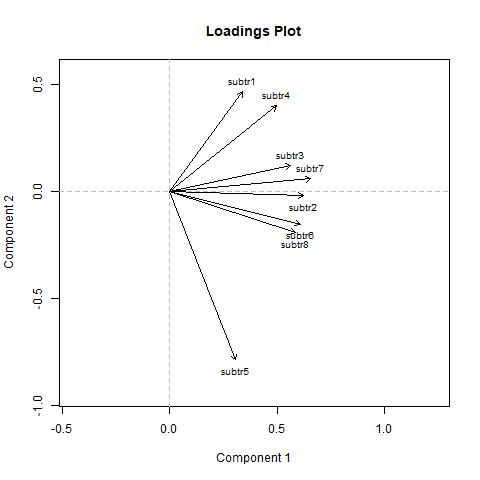

In [11]:
%%R
plot(prinzar)

If the items were unidimensional,
the arrows should approximately point in the same direction. We see that
item subtr5 is somewhat separated from the rest, whereas the remaining ones look
fairly homogeneous. This plot suggested that unidimensionality might be violated
due to subtr5. Therefore, we exclude subtr5 and re-run the analysis, you can use the following code chunk for that.

In [ ]:
# Remove subtr5 from the dataframe
zarsub2 = zarsub.drop("subtr5", axis=1)

# Put data back into R
ro.globalenv['zarsub2'] = zarsub2

# Princals
ro.r("prinzar <- princals(zarsub2)")
print(ro.r("summary(prinzar)"))


Loadings (cutoff = 0.1):
       Comp1  Comp2 
subtr2  0.622  0.132
subtr3  0.581 -0.449
subtr4  0.522       
subtr6  0.600 -0.172
subtr7  0.666 -0.199
subtr8  0.570  0.148
subtr1  0.360  0.818

Importance (Variance Accounted For):
                 Comp1   Comp2
Eigenvalues     2.2559  0.9838
VAF            32.2271 14.0541
Cumulative VAF 32.2300 46.2800

None


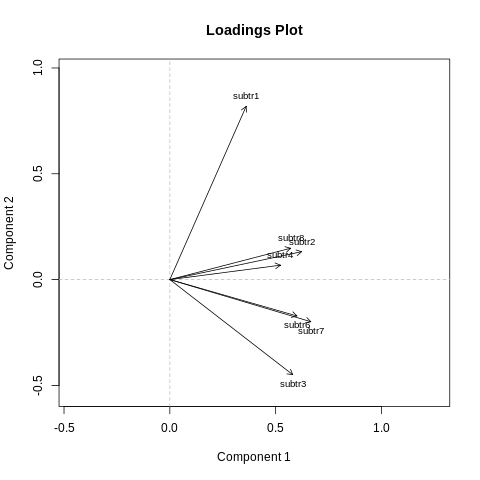

In [ ]:
%%R
plot(prinzar)

Looking at the plot do you notice any additional item standing out from the group?
If so, use the following code chunk to perform the same steps from before.
What do you notice?

In [ ]:
# subtr1 is separated from the rest, it should be removed
# Remove subtr1 from the dataframe
zarsub3 = zarsub2.drop("subtr1", axis=1)

# Put data back into R
ro.globalenv['zarsub3'] = zarsub3

# Princals
ro.r("prinzar <- princals(zarsub3)")
print(ro.r("summary(prinzar)"))


Loadings (cutoff = 0.1):
       Comp1  Comp2 
subtr2  0.619 -0.363
subtr3  0.608  0.375
subtr4  0.520  0.506
subtr6  0.612       
subtr7  0.676       
subtr8  0.570 -0.569

Importance (Variance Accounted For):
                 Comp1   Comp2
Eigenvalues     2.1797  0.8603
VAF            36.3284 14.3375
Cumulative VAF 36.3300 50.6700

None


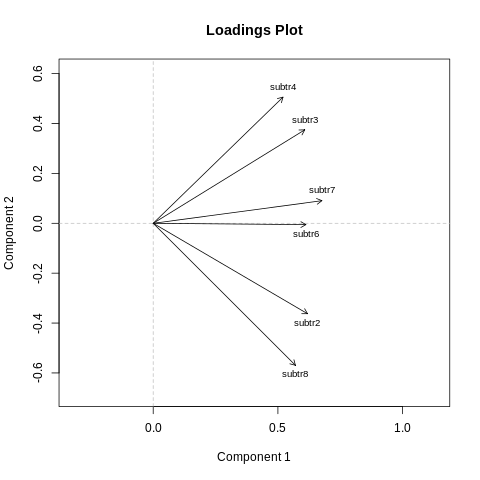

In [ ]:
%%R
plot(prinzar)

Now every item points approximately in the same direction and accordingly to our
categorical principal component analysis we can assume unidimensionality.

### **EFA tetrachoric**

As a second tool, we use an EFA on the tetrachoric correlation matrix.
We utilize several criteria including Parallel Analysis, Velicer's Minimum
Average Partial (MAP), Very Simple Structure (VSS), and Bayesian Information
Criterion (BIC) to assess dimensionality.
These criteria help us identify the optimal number of latent dimensions that
best explain the relationships among our variables.
To conduct the EFA on the tetrachoric correlation matrix, we set the maximum
number of factors to two. Below is the R code for performing this analysis
using the `fa.parallel()` function from the `psych` package (Revelle, 2017). First, lets fit the model to all subtraction items.

In [ ]:
# Run and plot parallel analysis # CHECK: Crashes often
#with grdevices.render_to_bytesio(grdevices.png, height=600, width=800) as img:
#    ro.r("fa.parallel(zarsub, fa = 'pc', cor = 'tet', fm = 'ml', n.iter = 1)")
#display(Image(img.getvalue()))

#ro.r("fa.parallel(zarsub, fa = 'pc', cor = 'tet', fm = 'ml', n.iter = 1)")

In [ ]:
# Perform EFA
efazar = ro.r("nfactors(zarsub, n=2, fm='ml', cor='tet')")
print(efazar)



Number of factors
Call: vss(x = x, n = n, rotate = rotate, diagonal = diagonal, fm = fm, 
    n.obs = n.obs, plot = FALSE, title = title, use = use, cor = cor)
VSS complexity 1 achieves a maximimum of 0.77  with  2  factors
VSS complexity 2 achieves a maximimum of 0.83  with  2  factors
The Velicer MAP achieves a minimum of 0.03  with  1  factors 
Empirical BIC achieves a minimum of  -33.98  with  2  factors
Sample Size adjusted BIC achieves a minimum of  22.19  with  2  factors

Statistics by number of factors 
  vss1 vss2   map dof chisq    prob sqresid  fit RMSEA   BIC SABIC complex
1 0.75 0.00 0.034  20   119 3.8e-16     3.8 0.75 0.121   2.7    66     1.0
2 0.77 0.83 0.061  13    57 2.0e-07     2.6 0.83 0.099 -19.1    22     1.2
  eChisq  SRMR eCRMS  eBIC
1    112 0.077 0.091  -4.3
2     42 0.047 0.069 -34.0



Now use the following code chunk to try the same steps on the dataset without
those items that violated unidimensionality. What do you notice? Are there any differences?

In [ ]:
# Perform EFA
efazar = ro.r("nfactors(zarsub3, n=2, fm='ml', cor='tet')")
print(efazar)



Number of factors
Call: vss(x = x, n = n, rotate = rotate, diagonal = diagonal, fm = fm, 
    n.obs = n.obs, plot = FALSE, title = title, use = use, cor = cor)
VSS complexity 1 achieves a maximimum of 0.82  with  1  factors
VSS complexity 2 achieves a maximimum of 0.86  with  2  factors
The Velicer MAP achieves a minimum of 0.04  with  1  factors 
Empirical BIC achieves a minimum of  -42.93  with  1  factors
Sample Size adjusted BIC achieves a minimum of  -8.72  with  1  factors

Statistics by number of factors 
  vss1 vss2   map dof chisq  prob sqresid  fit RMSEA BIC SABIC complex eChisq
1 0.82 0.00 0.044   9  15.2 0.085     2.1 0.82 0.045 -37  -8.7     1.0    9.6
2 0.69 0.86 0.116   4   5.3 0.260     1.6 0.86 0.031 -18  -5.4     1.2    3.3
   SRMR eCRMS eBIC
1 0.031 0.039  -43
2 0.018 0.035  -20



The Parallel Analysis suggests 1 factor, the VSS suggests two factors, the MAP one factor, and
the BIC two factors. As an additional diagnostic tool, a parallel analysis using the
fa.parallel function can be performed as well. Note that if the input items are
polytomous, setting cor="poly" does the job.

### **IFA**

As a third tool, let us use IFA as implemented in the `mirt` package (Chalmers,
2012). We fit a one-factor model and a two-factor model, and we compare these
nested fits via the AIC/BIC criteria.

In [ ]:
# Run IFA
fitifa1 = ro.r("mirt(zarsub, 1, verbose = FALSE, TOL = 0.001)")
print(fitifa1)

fitifa2 = ro.r("mirt(zarsub, 2, verbose = FALSE, TOL = 0.001)")
print(fitifa2)


Call:
mirt(data = zarsub, model = 1, TOL = 0.001, verbose = FALSE)

Full-information item factor analysis with 1 factor(s).
Converged within 0.001 tolerance after 15 EM iterations.
mirt version: 1.44.0 
M-step optimizer: BFGS 
EM acceleration: Ramsay 
Number of rectangular quadrature: 61
Latent density type: Gaussian 

Log-likelihood = -1263.202
Estimated parameters: 16 
AIC = 2558.405
BIC = 2619.715; SABIC = 2568.959
G2 (239) = 153.35, p = 1
RMSEA = 0, CFI = NaN, TLI = NaN


Call:
mirt(data = zarsub, model = 2, TOL = 0.001, verbose = FALSE)

Full-information item factor analysis with 2 factor(s).
Converged within 0.001 tolerance after 72 EM iterations.
mirt version: 1.44.0 
M-step optimizer: BFGS 
EM acceleration: Ramsay 
Number of rectangular quadrature: 31
Latent density type: Gaussian 

Log-likelihood = -1257.625
Estimated parameters: 23 
AIC = 2561.249
BIC = 2649.383; SABIC = 2576.422
G2 (232) = 142.19, p = 1
RMSEA = 0, CFI = NaN, TLI = NaN



AIC and BIC are (slightly) lower for the 1D solution, indicating a better fit for the 1D fit.

### Assessing dimensionality - Sum'ed up

Using all these tools in combination, we conclude that there is no drastic
unidimensionality violation in these data. Still, we obtained some hints that it might
be slightly violated. Princals gave a good indication that the items 5 and 1 may not behave
in the same way as the remaining items. The most straight forward approach is to exclude the items that violates unidimensionality.
Alternatively, in the case where numerous items are found to violate unidimensionality, there are also options for fitting a two-dimensional IRT model on the entire set of item, but we will not cover these approaches here.

### Section exercise
Now that you know how to perform dimensionality assessment, use the tools you have just learned
to test unidimensionality on the addition items of the `zareki` dataset. What conclusion can you
draw from the results of the analysis? You can use the following code-chunk to write your code.

In [ ]:
# Data handling

# Princals

# EFA tetrachoric

# ICA

### General remarks regarding fit assessment in IRT

IRT models can be used for several purposes. On the
one extreme, we can use IRT for scale construction. That is, we want to find a set of
“high-quality” items that measure an underlying construct as good as possible. On
the other extreme, we use a (well-established) scale, and our main interest is to score
the persons, and not so much to eliminate (slightly) misfitting items. Depending on
the purpose of the IRT analysis, different criteria may be used for fit assessment and
interpreted with various degrees of strictness: in a scale construction scenario, we
want to be strict, whereas in a person scoring scenario, we can be more laid back
in terms of misfit. The point is that users should not rely blindly on p-values spit
out by various model tests but rather assess the fit in relation to the purpose the
model is being used for (see Maydeu-Olivares, 2015). In any case, a good a priori
dimensionality assessment is crucial.

## 2. The Rasch model

The Rasch model can be used if we aim to construct a scale
that fulfills highest measurement standards. Using the Rasch Model, we model the probability that person v scores 1 on item i. Each item gets its individual item location parameter $β_i$. Within the context of ability tests, $β_i$ is often referred to as item easiness parameter.
Correspondingly, −$β_i$ is the item difficulty parameter. Each person gets a person
parameter $θ_v$, often called person ability parameter, which is obtained in a second
estimation step. Both the β’s and the θ’s are on an interval scale and can be mapped
on the same latent trait (i.e., they are directly comparable). \

The Rasch model has three fundamental assumptions:

* unidimensionality of the latent trait,
* parallel item characteristic curves (ICCs),
* local independence.

Unidimensionality was covered in detail in the section above. ICCs in conjunction
with parallel shifts will be explained further below, after fitting the Rasch model.
Local independence means that given a person parameter, item responses become
independent. This assumption is difficult to check and often omitted in practice.

Let us fit a Rasch model on the ZAREKI-R subtraction items from above. If
these data fit the Rasch model, all three assumptions can be considered as fulfilled.
In R, Rasch models can be computed using the eRm package (Mair and Hatzinger,
2007b) which uses a conditional maximum likelihood (CML) approach. \

The function for fitting the rashmodel is `RM()` and as argument it only requires
the data with which we want to fit the model. Have a look at the output: \

In [ ]:
fitrasch1 = ro.r("RM(zarsub)")
print(fitrasch1)


Results of RM estimation: 

Call:  RM(X = zarsub) 

Conditional log-likelihood: -646.9202 
Number of iterations: 12 
Number of parameters: 7 

Item (Category) Difficulty Parameters (eta):
             subtr2    subtr3     subtr4    subtr5    subtr6    subtr7
Estimate -0.7552998 1.6808330 -0.4774069 -0.280543 0.4163264 1.5508677
Std.Err   0.1619353 0.1310474  0.1515977  0.145557 0.1316531 0.1296646
             subtr8
Estimate -0.1884142
Std.Err   0.1430740





This model call fits the item parameters only. In the print output, the item
parameters are called η. There seems to be one parameter missing: the one for item
1. This is due to the fact that there is a restriction involved in the estimation, in
order to make the model identifiable. The full vector of β parameters for all items
can be obtained via a multiplication with a design matrix W which is constructed
internally (i.e., β = Wη). In order to extract the entire set of easiness parameters, we can say:

In [ ]:
# Get beta parameters
betapar = ro.r["coef"](fitrasch1)
rounded_sorted = np.sort(np.round(-betapar, 3))

print(rounded_sorted)

[-1.946 -0.755 -0.477 -0.281 -0.188  0.416  1.551  1.681]


Here we can now see the difficulty parameters, sorted from the easiest to the most difficult item.

### Assessing general model fit

Still, we need to verify whether the model fits, otherwise the interpretation of
these parameters is meaningless. A good strategy is to apply the LR-test proposed by
Andersen (1973), which is based on the following idea. Rasch measurement implies
that the item parameters have to be invariant across person subgroups (measurement
invariance). Therefore, for the Rasch model to fit, the item parameters based on
separate subgroup fits have to be approximately the same. This needs to hold for
any subgroup split. For instance, we can split the sample according to a median
or mean split based on the number of items solved or, even better, perform the split
according to one or multiple binary covariates. Here we use time as external splitting
variable (fast vs. slow according to a median split):

In [ ]:
# Get Median
median_time = zareki["time"].median()

# Create a categorical variable
timecat = pd.Categorical(
    ["fast" if t > median_time else "slow" for t in zareki["time"]],
    categories=["fast", "slow"]
)

print(timecat)

['fast', 'fast', 'fast', 'fast', 'fast', ..., 'slow', 'slow', 'slow', 'slow', 'slow']
Length: 341
Categories (2, object): ['fast', 'slow']


In [ ]:
# Put variables into R
ro.globalenv['fitrasch1'] = fitrasch1
ro.globalenv['timecat'] = timecat

# LR Test
fitLR = ro.r("LRtest(fitrasch1, timecat)")
print(fitLR)


Andersen LR-test: 
LR-value: 24.097 
Chi-square df: 7 
p-value:  0.001 




It gives a significant result which implies that the likelihoods differ across the two groups. The model does not fit. Which item is responsible for the misfit? We can explore this question in detail using a Wald test with the same split criterion.

### Assessing misfit at the item level

In [ ]:
# Wald test
fitWalt1 = ro.r("Waldtest(fitrasch1, timecat)")
print(fitWalt1)


Wald test on item level (z-values):

            z-statistic p-value
beta subtr1      -0.360   0.719
beta subtr2       0.237   0.813
beta subtr3      -2.342   0.019
beta subtr4       0.730   0.465
beta subtr5       4.199   0.000
beta subtr6      -0.548   0.584
beta subtr7      -1.529   0.126
beta subtr8      -0.469   0.639




Here, we can use the magnitudes of the p-values to judge the degree of misfit and
come to the conclusion that subtr5, already suspicious in the Princals solution
above, is most responsible for the misfit. A graphical illustration reflecting this
deviation can be produced as follows:

In [ ]:
# Put variable into R
ro.globalenv['fitLR'] = fitLR

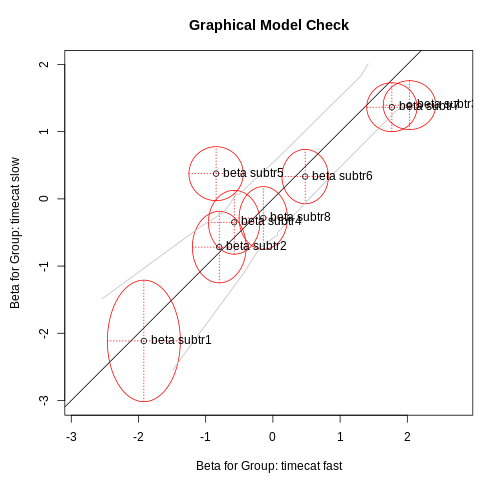

In [ ]:
%%R
plotGOF(fitLR, ctrline = list(col = "gray"), conf = list())

If the parameters were exactly the same across the
two subsamples, they would lie on the diagonal, and the model would fit. The gray
lines reflect the confidence bands around the diagonal. The 95% confidence ellipses
for the item parameters are shown in red. We see that subtr5 is clearly outside
the confidence band, and we have good evidence for eliminating it. We are going to
refit the model without this item, apply the LR-test once more, and check whether
the Rasch model fits.

### Refit the model with only well fitting items
Make a new model only including valid items and test it using the `LRtest()` function. \

In [ ]:
# Fit the model
fitrasch2 = ro.r("RM(zarsub2)")
print(fitrasch2)

# Put variable into R
ro.globalenv['fitrasch2'] = fitrasch2

# LR Test
fitLR2 = ro.r("LRtest(fitrasch2, timecat)")
print(fitLR2)

# Wald Test
fitWalt2 = ro.r("Waldtest(fitrasch2, timecat)")
print(fitWalt2)

# Put variable into R
ro.globalenv['fitLR2'] = fitLR2


Results of RM estimation: 

Call:  RM(X = zarsub2) 

Conditional log-likelihood: -505.4673 
Number of iterations: 11 
Number of parameters: 6 

Item (Category) Difficulty Parameters (eta):
             subtr2    subtr3     subtr4    subtr6    subtr7     subtr8
Estimate -0.8262491 1.7167464 -0.5403677 0.3872352 1.5805610 -0.2422317
Std.Err   0.1637810 0.1362897  0.1536065 0.1347287 0.1346705  0.1453549




Andersen LR-test: 
LR-value: 5.715 
Chi-square df: 6 
p-value:  0.456 



Wald test on item level (z-values):

            z-statistic p-value
beta subtr1       0.128   0.898
beta subtr2       0.806   0.420
beta subtr3      -1.855   0.064
beta subtr4       1.323   0.186
beta subtr6       0.031   0.975
beta subtr7      -1.025   0.306
beta subtr8       0.117   0.907




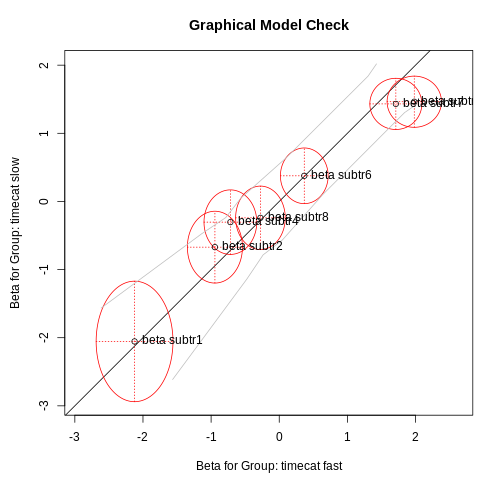

In [ ]:
%%R
plotGOF(fitLR2, ctrline = list(col = 'gray'), conf = list())

### Interpretation
The nonsignificant p-value suggests that the model fits.
In practice, it is suggested to run these tests on multiple external binary
covariates. It is important to eliminate only one item at a time and then refit the
model which, of course, can be tedious in cases where many items need to be
eliminated. If you are curious, the eRm package provides the convenience function stepwiseIt
which eliminates items until a particular test of choice fits.

### Item-specific local independence (T1-test) local independence at a global level (T11-test)

It has been shown in simulation studies (Suárez-Falcón and Glas, 2003) that the
LR-test works well for detecting violations of unidimensionality and parallel ICC
violations. Based on the nonsignificant result from above, we can conclude that
these assumptions are not violated. If we want to test assumptions more explicitly,
the nonparametric testing framework proposed by Ponocny (2001) provides a
large amount of testing possibilities. The `eRm` package uses the `RaschSampler`
package (Verhelst et al., 2007) internally determine to compute the test statistics.
As an example, we examine item-specific local independence (T1-test) and local
independence at a global level (T11-test).

In [ ]:
# Drop not wanted columns
zarsub4 = zarsub.drop(zarsub.columns[4], axis=1)

# Put variable into R
ro.globalenv['zarsub4'] = zarsub4

# T1-test
T1 = ro.r("NPtest(as.matrix(zarsub4), n=1000, method='T1')")
print(T1)

# T11-test
T11 = ro.r("NPtest(as.matrix(zarsub4), n=1000, method='T11')")
print(T11)

Nonparametric RM model test: T1 (local dependence - increased
    inter-item correlations)
    (counting cases with equal responses on both items)
Number of sampled matrices: 1000 
Number of Item-Pairs tested: 21 
Item-Pairs with one-sided p < 0.05 
none


Nonparametric RM model test: T11 (global test - local dependence)
(sum of deviations between observed and expected inter-item
    correlations)
Number of sampled matrices: 1000 
one-sided p-value: 0.901 




The first output suggests that none of the item pairs show significant local
dependence. The second test output confirms this result by telling us that local
independence holds at a global level (see not-significant p-value).

### Interpret item parameters

At this point we can conclude that our data fit the Rasch model. This gives our
scale the highest seal of approval. Thus, we can interpret the item parameters and,
finally, elaborate on what (parallel) ICCs are.
To do so, use the Rash model fited on only the valid items and print the parameters
in a sorted manner: \

In [ ]:
# Fit the model
fitrasch3 = ro.r("RM(zarsub2)")
print(fitrasch3)

# Put variable into R
ro.globalenv['fitrasch3'] = fitrasch3

# Get beta parameters
betapar = ro.r["coef"](fitrasch3)
rounded_sorted = np.sort(np.round(-betapar, 3))

print(rounded_sorted)


Results of RM estimation: 

Call:  RM(X = zarsub2) 

Conditional log-likelihood: -505.4673 
Number of iterations: 11 
Number of parameters: 6 

Item (Category) Difficulty Parameters (eta):
             subtr2    subtr3     subtr4    subtr6    subtr7     subtr8
Estimate -0.8262491 1.7167464 -0.5403677 0.3872352 1.5805610 -0.2422317
Std.Err   0.1637810 0.1362897  0.1536065 0.1347287 0.1346705  0.1453549



[-2.076 -0.826 -0.54  -0.242  0.387  1.581  1.717]


### Plot ICC

You might notice that the item difficulties directly correspond to the intercepts in the plot below. Lower item difficulties (e.g. item 1) therefore go along with a higher probability to score (and vice versa).

ICCs, sometimes also called item response functions, determine the item behavior
(i.e., endorsement probability) along the latent trait.

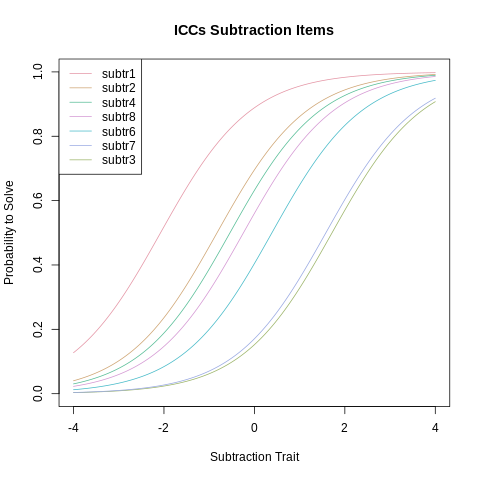

In [ ]:
%%R
plotjointICC(fitrasch3, xlab = 'Subtraction Trait', main = 'ICCs Subtraction Items')

First of all, we see that all ICCs are parallel, and all of them have a slope of 1.
This is an implication of the Rasch model which will be relaxed in the next section.
The plot shows that item 1 is the easiest item, since it is located furthest to the left
on the trait. Item 3 is to the far right and consequently the most difficult one. In
this plot, the item parameters are reflected the value on the x-axis for which the
endorsement probability is exactly 0.5. In the plot, this is demonstrated for item 3.

### Section Exercise

Use what you learned to perform the same type of analysis on the addition items and plot the item response functions.

### Estimate person parameter

Once the model fits, we can estimate the person parameter in a second step:

In [ ]:
zarppar = ro.r("person.parameter(fitrasch2)")
print(zarppar)


Person Parameters:

 Raw Score   Estimate Std.Error
         0 -3.4339847        NA
         1 -2.2893324 1.1743143
         2 -1.2100273 0.9467201
         3 -0.3879450 0.8812713
         4  0.3846573 0.8862733
         5  1.2190514 0.9524209
         6  2.2958672 1.1656078
         7  3.4334872        NA



Each individual gets its own person parameter. Children who answered the same
number of items correctly will get the same person parameter. They are mapped on
the same latent trait as the items. \

**Raw Score**: This column represents the observed raw scores on the test or assessment. These are the total number of correct responses each person obtained on the test. \

**Estimate**: This column represents the estimated person parameters for each raw score. The person parameters indicate the latent trait or ability level of individuals on the underlying construct being measured by the test. In the Rasch model, these estimates are usually expressed in log-odds units, also known as logits. \

**Std.Error**: This column represents the standard error associated with each person parameter estimate. It indicates the precision or reliability of the estimate. A lower standard error suggests a more precise estimate. \
For instance, for individuals with a raw score of 0 (meaning they got no items correct), the estimated person parameter is approximately -3.43 logits. This suggests that individuals who scored 0 on the test are estimated to have lower ability levels on the subtraction trait being measured.
Conversely, individuals with higher raw scores have higher estimated person parameters, indicating higher ability levels on the underlying trait.
Standard errors are not provided for extreme raw scores (0 and 7), likely due to lack of data at these points. However, for other raw scores, you can see the standard errors associated with the estimates.

### Add person parameters to the data matrix and use them in further analyses

The person parameters can be added to the data matrix and used for further
statistical analysis as metric variable. Here we show an ANOVA with school year as
factor (three levels).

In [ ]:
zareki = zareki.rename(columns={'class': 'school_class'}) # Rename 'class' to something else, as it is a reserved keyword in Python (this would later cause issues in statsmodels)

# Get theta table and convert it into a pandas df
theta_table = zarppar.rx2("theta.table")

with localconverter(ro.default_converter + pandas2ri.converter):
    theta_df = ro.conversion.rpy2py(theta_table)

# Add the person parameter to the original zareki df
zareki['theta'] = theta_df["Person Parameter"].values
print(zareki.head())

   addit1  addit2  addit3  addit4  addit5  addit6  addit7  addit8  subtr1  \
1     1.0     1.0     1.0     1.0     1.0     1.0     1.0     0.0     1.0   
2     1.0     1.0     1.0     1.0     0.0     1.0     1.0     0.0     1.0   
3     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
4     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
5     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   

   subtr2  subtr3  subtr4  subtr5  subtr6  subtr7  subtr8  school_class  time  \
1     1.0     1.0     1.0     1.0     1.0     0.0     1.0             1  39.0   
2     1.0     1.0     1.0     1.0     1.0     0.0     1.0             1  37.0   
3     1.0     0.0     1.0     1.0     0.0     0.0     1.0             1  34.0   
4     1.0     0.0     1.0     1.0     0.0     1.0     1.0             1  28.0   
5     1.0     0.0     1.0     1.0     0.0     0.0     1.0             1  32.0   

      theta  
1  2.295867  
2  2.295867  
3  0.384

In [ ]:
# Ensure that the column "class" is treated as a categorical variable.
zareki['school_class'] = zareki['school_class'].astype('category')

import statsmodels.formula.api as smf
import statsmodels.api as sm

# Fit the model and perform the ANOVA
model = smf.ols('theta ~ school_class', data=zareki).fit()

anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
school_class,2.0,129.103094,64.551547,31.795033,2.226393e-13
Residual,338.0,686.221106,2.030240,NaN,NaN


The result suggests significant differences in ability across the 3 years. Still, the
subtraction scale is fair since the Rasch model holds: fairness is a property of the
item parameters, and not a person parameter property.

---

An important contribution to the Rasch ecosystem was the idea to embed Rasch
models into a mixed-effects models framework. To be more precise, Rasch models
are nothing else than mixed-effects logistic regressions with, in their most basic
form, items as fixed effects and persons as random effects. The random intercepts
correspond to the person parameters, the fixed effect parameters to the item location
parameters. This idea of explanatory item response models adds many modeling
possibilities (see De Boeck et al., 2011, for details).

## 3. Two-parameter logistic model

The parallel ICC assumption involving constant slope parameters of 1 is a rather
strict one. One-parameter logistic model versions of Rasch (called 1-PL or OPLM) relax this assumption slightly by estimating a single item discrimination parameter
α, generally different from 1. Still, the ICCs are parallel. This idea represents a
different philosophical measurement perspective. Under the Rasch paradigm, we
modify the data such that it fits the Rasch model. Under the 1-PL and the other
models presented in this section, we try to find a model that fits our data. \

In practice, the two-parameter logistic model (2-PL Birnbaum, 1968) is more
relevant than the 1-PL. It estimates an item discrimination parameter αi for each
item individually, which allows the ICCs to cross. Compared to the Rasch model, it relaxes the assumption of parallel ICCs through
$α_i$ , while unidimensionality and local independence still need to hold.

### The dataset

The dataset we use to illustrate the 2-PL is taken from Mair et al. (2015). In this
study, the authors were interested in finding out why package developers contribute
to R. Among other things, they presented three subscales of the Work Design
Questionnaire (WDQ) by Morgeson and Humphrey (2006), in order to explore
whether certain work design characteristics had an influence on the participation
in package developments. In our little IRT application below, the main interest is
not to remove many items in order to achieve a strong measurement instrument.
Rather, the main objective is to score the developers and only remove items that are
heavily misfitting. Hence, we use a more flexible 2-PL since a Rasch model might
be too strict. We consider a single WDQ subscale only: “knowledge characteristics” which
includes 18 dichotomous items related to job complexity, information processing,
problem solving, skill variety, and specialization.

### Load & inspect the data

Before fitting the model we need to drop the first column as it is not related to items responses. Also, since the model can only handle items with two response options, we have to convert the data. Altough the values are only 1.0 and 0.0, the model can't handle this format as it need 'pure' 1 and 0 values (i.e., logical instead of double).

In [ ]:
# Load the data in R
ro.r("data(RWDQ)")

# Get as DataFrame
RWDQ = pandas2ri.rpy2py(ro.globalenv['RWDQ'])

RWDQ.head()


,wdq_22,wdq_23,wdq_24,wdq_25,wdq_26,wdq_27,wdq_28,wdq_29,wdq_30,wdq_31,wdq_32,wdq_33,wdq_34,wdq_35,wdq_36,wdq_37,wdq_38,wdq_39
1,1.0,1.0,1.0,1.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,0.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Fit the model

Note that z1, on the right-hand side of the formula interface, is a generic placeholder for the single latent dimension.

In [ ]:
# Fit the model
fit2pl1 = ro.r("ltm(RWDQ ~ z1)")
print(fit2pl1)


Call:
ltm(formula = RWDQ ~ z1)

Coefficients:
        Dffclt  Dscrmn
wdq_22  -9.490   0.124
wdq_23   1.067  -0.732
wdq_24   0.389  -0.816
wdq_25   1.456  -1.561
wdq_26   2.125  -0.664
wdq_27   0.571  -1.153
wdq_28   1.136  -0.811
wdq_29   2.288  -1.297
wdq_30   1.835  -0.857
wdq_31   0.748  -0.926
wdq_32   0.773  -0.822
wdq_33   2.513  -1.709
wdq_34   2.385  -1.339
wdq_35   3.136  -0.967
wdq_36   1.365  -1.041
wdq_37   1.116  -1.176
wdq_38   0.788  -2.696
wdq_39   1.150  -1.970

Log.Lik: -7648.692




The first column contains the item difficulty parameters $β_i$ . Since the construct
is knowledge characteristics, speaking about difficulty does not make sense. A
large $β_i$ simply means that the item is located at the upper end of the knowledge
characteristics continuum. That is, it allows us to discriminate among persons
with high-knowledge characteristics. Conversely, a low item parameter measures
knowledge characteristics at its lower end and, correspondingly, discriminates
among persons with low knowledge characteristic. The second column shows the
item discrimination parameters αi which reflect the varying ICC slopes. \
In the print output above, the item location parameter of item 22 (first row) is
unreasonably low, compared to the other parameters. Reasons for such a heavily
outlying parameter are that either the algorithm did not converge or the item violates
an assumption. Plotting a Princals solution on this dataset (not shown here), suggests
that item 22 deviates strongly from the remaining ones. Thus, let us eliminate
wdq_22 and refit the 2-PL model.

### Refit after eliminating wdq_22

In [ ]:
# Drop item wdq_22
RWDQsub = RWDQ.drop("wdq_22", axis=1)

# Put variable into R
ro.globalenv['RWDQsub'] = RWDQsub

# Fit the model
fit2pl2 = ro.r("ltm(RWDQsub ~ z1)")
print(fit2pl2)


Call:
ltm(formula = RWDQsub ~ z1)

Coefficients:
        Dffclt  Dscrmn
wdq_23  -1.064   0.736
wdq_24  -0.387   0.822
wdq_25  -1.456   1.561
wdq_26  -2.113   0.668
wdq_27  -0.570   1.157
wdq_28  -1.138   0.808
wdq_29  -2.281   1.303
wdq_30  -1.835   0.858
wdq_31  -0.748   0.925
wdq_32  -0.775   0.819
wdq_33  -2.506   1.716
wdq_34  -2.382   1.341
wdq_35  -3.132   0.968
wdq_36  -1.368   1.038
wdq_37  -1.118   1.173
wdq_38  -0.789   2.678
wdq_39  -1.151   1.967

Log.Lik: -7090.504




### Explore item fit

Let us do a final itemfit check by computing a $χ^2$-based itemfit statistic called Q1, following Yen (1981). In general,
a significant p-value suggests that the item does not fit. But based on the fact that
the Q1 statistic exhibits inflated Type I error rates and other (not mentioned) considerations regarding
scale construction vs. evaluation, we do not have to
use these p-values as our only criterion to keep or eliminate items.

In [ ]:
# Put variable into R
ro.globalenv['fit2pl2'] = fit2pl2
# Run item.fit()
itemfit = ro.r("item.fit(fit2pl2)")
print(itemfit)


Item-Fit Statistics and P-values

Call:
ltm(formula = RWDQsub ~ z1)

Alternative: Items do not fit the model
Ability Categories: 10

           X^2 Pr(>X^2)
wdq_23  7.2445   0.5105
wdq_24  0.0000        1
wdq_25  0.0000        1
wdq_26  0.0000        1
wdq_27  0.0000        1
wdq_28  0.0000        1
wdq_29  0.0000        1
wdq_30  4.2489    0.834
wdq_31  0.0000        1
wdq_32  6.8452   0.5534
wdq_33  0.0000        1
wdq_34 13.9219   0.0838
wdq_35 10.5261     0.23
wdq_36  4.6761   0.7916
wdq_37  0.0000        1
wdq_38  0.0000        1
wdq_39  9.4313   0.3072





The results suggest that the entire set of items fits; none of the
p-values is significant. Thus, no further item elimination steps are needed.

### Explore the ICCs

The ICCs for the first five items can be produced as follows:

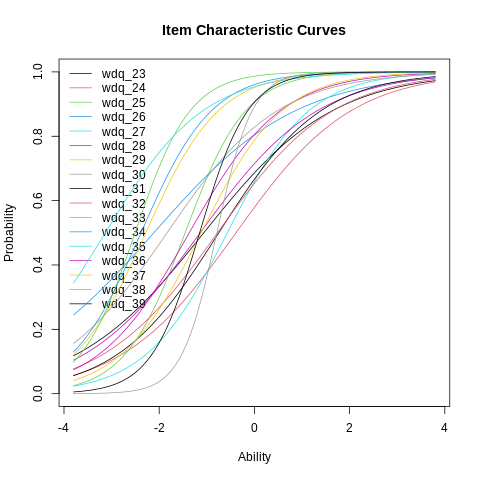

In [ ]:
%%R
plot(fit2pl2, legend=TRUE)

Compared to the Rasch model, the striking difference is that the 2-PL ICCs are
allowed to cross. Item locations can be displayed in the same way as in the Rasch
model: think of a horizontal line at p = 0.5, and then drop vertical lines down to the
x-axis from where it intersects with the ICC. We see that wdq_25 has the largest
discrimination parameter, leading to the steepest ICC slope.

### Explore the discrimination parameters

In [ ]:
disc_coeffs = ro.r("sort(round(coef(fit2pl2)[1:5, 2], 3))")
print(disc_coeffs)

[0.668 0.736 0.822 1.157 1.561]


“Good” discrimination parameters are typically in the range from 0.8 to 2.5 (de
Ayala, 2009). Outside this range, the ICCs are either too flat (such items do not
discriminate well along the entire continuum) or too steep (such items discriminate
only within a very narrow trait range). One can see again that wdq_25 has the largest
discrimination parameter.

### Estimate person parameters

Since the 2-PL fits, we can compute the person parameters.

In [ ]:
ppars = ro.r("factor.scores(fit2pl2, resp_patterns=RWDQsub)$score.dat[, 'z1']")
print(ppars[:5])

[-2.55273404 -2.20716547 -1.84482957 -0.94047876 -1.36764477]


## 4. Three-parameter logistic model

Let us add another parameter which brings us to the three-parameter
logistic model (3-PL; Birnbaum, 1968). The new parameter $γ_i$ reflects the probability of a 1-response on item i due to chance
alone and is often referred to as pseudo-guessing parameter. With respect to the
ICCs, it reflects a lower asymptote parameter. That is, even someone with infinite
low ability has a certain probability to score 1 on item i. These probabilities vary
across items. With the 3-PL, we create a model that is even more flexible than the
2-PL, but still, unidimensionality and local independence need to be fulfilled.

### The dataset

To illustrate a 3-PL model fit, we reproduce some of the analyses carried out
in Wilmer et al. (2012). Within the context of a face recognition experiment, they
presented the Verbal Paired-Associates Memory Test (VPMT; Woolley et al., 2008)
to the participants. The authors used a 3-PL since their main goal was to score the
persons, rather than being strict on the item side in terms of eliminating items. Let
us load the dataset and extract the 25 VPMT items.

### Load and inspect the data

Before fitting the model we need to drop the first column as it is not related to items responses.

In [ ]:
# Load the data
ro.r("data(Wilmer)")

# Get as DataFrame
Wilmer = pandas2ri.rpy2py(ro.globalenv['Wilmer'])

# Drop the first two columns
VPMT = Wilmer.drop(Wilmer.columns[0:2], axis=1)

# Put bariable into R
ro.globalenv['VPMT'] = pandas2ri.py2rpy(VPMT)

### Fit the model

In [ ]:
fit3pl = ro.r("tpm(VPMT)")

# Put bariable into R
ro.globalenv['fit3pl'] = pandas2ri.py2rpy(fit3pl)

print(fit3pl)


Call:
tpm(data = VPMT)

Coefficients:
        Gussng  Dffclt  Dscrmn
vpmt1    0.071  -0.216   1.531
vpmt2    0.280   1.020   1.736
vpmt3    0.384   1.527   1.763
vpmt4    0.103   0.470   1.264
vpmt5    0.023  -0.299   1.247
vpmt6    0.135   0.504   1.192
vpmt7    0.229   0.747   1.702
vpmt8    0.238   0.679   1.412
vpmt9    0.278   1.350   1.584
vpmt10   0.233   0.248   1.588
vpmt11   0.271   0.840   1.360
vpmt12   0.264   0.754   2.173
vpmt13   0.296   1.513   2.466
vpmt14   0.191   1.889   1.455
vpmt15   0.183   0.660   1.374
vpmt16   0.088   0.319   1.561
vpmt17   0.386   0.590   2.500
vpmt18   0.214   0.629   1.705
vpmt19   0.193   0.792   1.579
vpmt20   0.264   0.362   1.965
vpmt21   0.178   0.725   2.278
vpmt22   0.167   1.091   2.774
vpmt23   0.295   0.788   1.973
vpmt24   0.235   0.641   1.607
vpmt25   0.180   0.743   1.769

Log.Lik: -23078.57




In addition to the item locations and the discrimination parameters, we get
pseudo-guessing parameters.

### Explore the ICCs

The ICCs for the first six items can be plotted as follows:

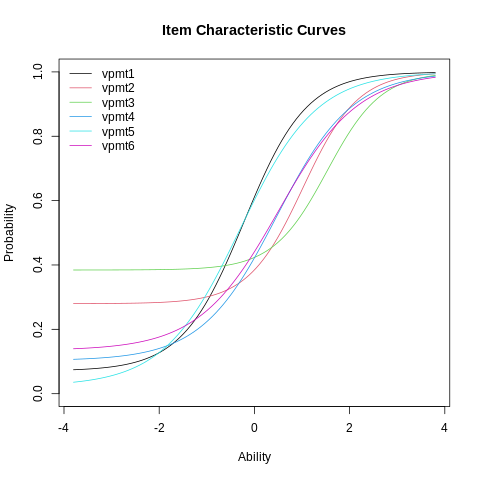

In [ ]:
%%R
plot(fit3pl, item=1:6, legend=TRUE)

We see the effect of the γ -parameters in
terms of lower ICC asymptotes. Item 3 has the largest pseudo-guessing parameter.
As in the 2-PL, the ICCs are allowed to cross due to the α’s in the model.